<a href="https://colab.research.google.com/github/rodrigocan/made-with-ml/blob/main/notebooks/04_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Nesta aula vamos aprender o básico de manipulação de dados utilizando a biblioteca Pandas.

# Configuração

In [32]:
import numpy as np
import pandas as pd

In [33]:
# Definindo um seed para que seja possível reproduzir os resultados em outro ambiente
np.random.seed(seed = 1234)

# Carregamento dos dados

Vamos trabalhar com o [dataset Titanic](https://www.kaggle.com/c/titanic/data), que contém dados de pessoas que embarcaram no RMS Titanic em 1912 e se elas sobreviveram ou não. É um dataset muito comum e rico, sendo muito utilizado para análise exploratória de dados com o Pandas.

Vamos carregar os dados do arquivo CSV dentro de um dataframe do Pandas. O `header = 0` significa que a primeira linha (índice 0) é o cabeçalho que contém os nomes de cada coluna do nosso dataset.

In [34]:
# Carregando o CSV para um dataframe do Pandas
url = "https://raw.githubusercontent.com/rodrigocan/made-with-ml/main/datasets/titanic.csv"
df = pd.read_csv(url, header = 0)

In [35]:
# Primeiras cinco linhas
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


Variáveis do dataset:

* `class`: classe da viagem
* `name`: nome completo do passageiro
* `sex`: gênero
* `age`: idade
* `sibsp`: número de irmãos/cônjuge a bordo
* `parch`: número de pais/filho a bordo
* `ticket`: número do bilhete
* `fare`: custo da passagem
* `cabin`: localização do quarto
* `emarked`: porto onde o passageiro embarcou (C - Cherbourg, S - Southhampton, Q - Queenstown)
* `survived`: indica se o passageiro sobreviveu (0 - morreu, 1 - sobreviveu)

# Análise exploratória dos dados

Agora que carregamos nossos dados, estamos prontos para explorá-los para encontrar informações interessantes.

In [36]:
import matplotlib.pyplot as plt

Podemos usar `.describe()` para extrair algumas métricas das nossas variáveis.

In [37]:
# Extraindo métricas das variáveis (contagem, média, desvio-padrão, mínimo, percentis e máximo)
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


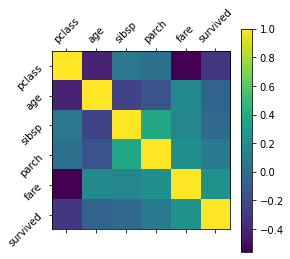

In [38]:
# Matriz de correlação
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation = "45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation = "45")
plt.colorbar()
plt.show()

Também podemos utilizar `.hist()` para visualizar a distribuição dos valores de cada variável.

<AxesSubplot:>

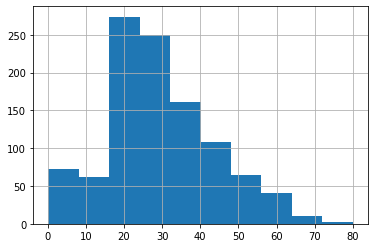

In [39]:
# Histograma
df["age"].hist()

In [40]:
# Valores únicos (classes de uma variável)
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

# Filtrando

In [41]:
# Selecionando dados pelo valor da variável
df[df["sex"] == "female"].head() # somente dados do sexo feminino

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


# Ordenando

In [42]:
# Ordenando
df.sort_values("age", ascending = False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


# Agrupando

In [43]:
# Agrupando
survived_group = df.groupby("survived")
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


# *Indexing*

Podemos utilizar `iloc` para retornar linhas ou colunas em posições específicas do dataframe.

In [44]:
# Selecionando a linha 0
df.iloc[0, :]

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                  29.0
sibsp                                   0
parch                                   0
ticket                              24160
fare                             211.3375
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [45]:
# Selecionando um valor específico
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

# Pré-processamento

Depois de explorar, podemos limpar e pré-processar o nosso dataset.

In [46]:
# Linhas com pelo menos um valor NaN
df[pd.isnull(df).any(axis = 1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [47]:
# Excluir linhas com valores NaN
df = df.dropna() # remove linhas com valores NaN em qualquer variável
df = df.reset_index() # redefine os índices das linhas no caso de exclusão de qualquer linha
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [48]:
# Excluindo múltiplas colunas
df = df.drop(["name", "cabin", "ticket"], axis = 1) # não utilizaremos variáveis de texto para nossos modelos básicos iniciais
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [49]:
# Mapeando variáveis categóricas para valores numéricos
df["sex"] = df["sex"].map({ "female": 0, "male": 1 }).astype(int)
df["embarked"] = df["embarked"].dropna().map({ "S": 0, "C": 1, "Q": 2 }).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# *Feature engineering*

Agora queremos usar *feature engineering* para criar uma coluna chamada `family_size`. Primeiro vamos definir uma função chamada `get_family_size` que irá calcular o tamanho da família utilizando o número de pais e irmãos.

In [50]:
# Função para criação de uma nova variável
def get_family_size(sibsp, parch):
  family_size = sibsp + parch
  return family_size

Agora que definimos a função, vamos usar o `lambda` para aplicar (`apply`) a função em cada linha (usando o número de irmãos e pais em cada linha para determinar o tamanho da família).

In [52]:
df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis = 1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [53]:
# Reorganizando as colunas
df = df[["pclass", "sex", "age", "sibsp", "parch", "family_size", "fare", "embarked", "survived"]]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


# Salvando os dados

Por fim, vamos salvar nossos dados pré-processados dentro de um novo arquivo CSV para usar depois.

In [54]:
# Salvando o dataframe em um arquivo CSV
df.to_csv("processed_titanic.csv", index = False)

In [55]:
# Visualizando o arquivo salvo
!ls -l

total 12
-rw-r--r-- 1 root root 6975 Mar  6 01:29 processed_titanic.csv
drwxr-xr-x 1 root root 4096 Mar  3 01:40 sample_data
